In [2]:
import os, json, re
import pandas as pd
import matplotlib.pyplot as plt

import sys, os
sys.path.append("..")
from src.tasks.game24 import Game24

In [39]:
def get_files_in_folder(folder_path):
    files = []
    for root, directories, filenames in os.walk(folder_path):
        for filename in filenames:
            files.append(os.path.join(root, filename))
    return files

def get_agents_difficulty_model(file_name):
    match = re.search(r'(\d+)agents.*_(\d+)start', file_name)

    if match:
        model = file_name.split("/")[-1].split("__")[0]
        num_agents = int(match.group(1))
        difficulty = int(int(match.group(2))/100)
        return num_agents, difficulty, model
    else:
        print("Pattern not found in file name:", file_name)

folder_path = '../logs/analysis'
files_in_folder = get_files_in_folder(folder_path)
files_in_folder = [file for file in files_in_folder if file.endswith(".json")]

results = []
for file in files_in_folder:
    experiment = {}
    experiment["num_agents"], experiment["difficulty"], experiment["model"] = get_agents_difficulty_model(file)
    experiment["accuracy"] = Game24.get_accuracy(file, verbose=False)
    experiment["cost"] = Game24.get_cost(file, verbose=False)
    results.append(experiment)

df = pd.DataFrame(results)
df.sort_values(by=["difficulty", "model"], inplace=True)
df.reset_index(drop=True, inplace=True)
df["model"] = df.apply(lambda x: x["model"] + "\n(" + str(x["difficulty"])+" difficulty)", axis=1)
df["accuracy"] = df["accuracy"]*100
display(df)

,num_agents,difficulty,model,accuracy,cost
0,3,0,gpt-3.5-turbo-0125\n(0 difficulty),6.0,0.060671
1,10,0,gpt-3.5-turbo-0125\n(0 difficulty),34.0,0.207372
2,5,0,gpt-3.5-turbo-0125\n(0 difficulty),18.0,0.106644
3,3,0,gpt-3.5-turbo-1106\n(0 difficulty),12.0,0.097577
4,10,0,gpt-3.5-turbo-1106\n(0 difficulty),44.0,0.328292
5,5,0,gpt-3.5-turbo-1106\n(0 difficulty),16.0,0.164104
6,5,9,gpt-3.5-turbo-0125\n(9 difficulty),2.0,0.551095
7,10,9,gpt-3.5-turbo-0125\n(9 difficulty),14.0,1.095950
8,10,9,gpt-3.5-turbo-1106\n(9 difficulty),10.0,1.692358
9,3,9,gpt-3.5-turbo-1106\n(9 difficulty),0.0,0.516717


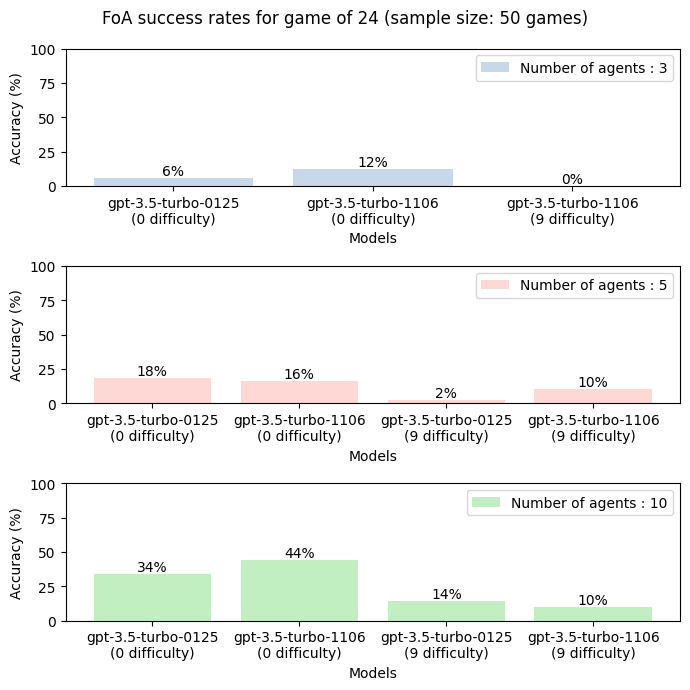

In [59]:
n_agents = [3, 5, 10]
fig, axes = plt.subplots(len(n_agents), 1, figsize=(7,7))  # 2 rows, 1 column
colors = ["steelblue", "salmon", "limegreen"]

for j, n in enumerate(n_agents):
    temp = df[df.num_agents == n]
    accuracies = temp.accuracy.tolist()
    models = temp.model.tolist()
    costs = temp.cost.tolist()
    agents  = temp.num_agents.tolist()

    # Plotting accuracies
    color = colors[j]
    axes[j].set_xlabel('Models')
    axes[j].set_ylabel('Accuracy (%)')
    bars = axes[j].bar(models, accuracies, color=color, alpha=0.3, label=f"Number of agents : {n}")
    axes[j].tick_params(axis='y')
    axes[j].set_ylim(0, 100)
    axes[j].legend()

    for bar, acc in zip(bars, accuracies):
        axes[j].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.0f}%', 
                     ha='center', va='bottom', color='black')

plt.suptitle("FoA success rates for game of 24 (sample size: 50 games)")
plt.tight_layout()
plt.savefig("../pics/accuracies_simple_foa.png", dpi=300)
plt.show()